In [17]:
import pandas as pd
import numpy as np
file = "C:\\Users\\yogen\\ML-LAB_S5\\Lab Session Data.xlsx"

data = pd.ExcelFile(file)

# A1. Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data
#and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following activities.
• What is the dimensionality of the vector space for this data?

1.   How many vectors exist in this vector space?
2.   What is the rank of Matrix A?
3.   Using Pseudo-Inverse find the cost of each product available for sale. (Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a pseudo-inverse.)
4. What is the dimensionality of the vectorspace






In [1]:
def a1():
    df1 = pd.read_excel(file, sheet_name=0)
    matrix1 = df1.loc[:,'Candies (#)':'Payment (Rs)']
    A_matrix = matrix1.loc[:,'Candies (#)':'Milk Packets (#)']
    #vectors in matrix 
    q1 = len(matrix1.columns)
    #number of rows in matrix
    q2 = np.linalg.matrix_rank(A_matrix)
    #inverse of matrix
    q3 = np.linalg.pinv(matrix1)
    #dimensionality of matrix
    q4 = np.shape(matrix1)
    return q1, q2, q3, q4



# A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products available with the vendor.

In [2]:
def a2():
    df1 = pd.read_excel(file, sheet_name=0)
    matrix1 = df1.loc[:,'Candies (#)':'Payment (Rs)']
    #vectors in matrix
    A_matrix = matrix1.loc[:,'Candies (#)':'Milk Packets (#)']
    # target vector
    C_matrix = matrix1.loc[:,'Payment (Rs)']
    #X = A^-1 * C	
    X_vector = np.linalg.pinv(A_matrix).dot(C_matrix)
    return X_vector



# A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on purchase behavior.


In [3]:
def a3():
    df1 = pd.read_excel(file, sheet_name=0)
    matrix2 = df1.loc[:,'Customer': 'Payment (Rs)']
    #classifying customers as rich or poor
    matrix2['class'] = matrix2['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')
    return matrix2



# Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the following after loading the data to your programming platform.




*   Calculate the mean and variance of the Price data present in column D. (Suggestion: if you use Python, you may use statistics.mean() &
statistics.variance() methods).
*   Select the price data for all Wednesdays and calculate the sample mean. Compare the mean
*  Select the price data for the month of Apr and calculate the sample mean. Compare the mean with the population mean and note your observations.
*  From the Chg% (available in column I) find the probability of making a loss over the stock. (Suggestion: use lambda function to find negative values)
* Calculate the probability of making a profit on Wednesday.
* Calculate the conditional probability of making profit, given that today is Wednesday.
* Make a scatter plot of Chg% data against the day of the week








In [34]:
df2 = pd.read_excel(file, sheet_name=1)
df2

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [35]:
import matplotlib.pyplot as plt


def mean_var():
    return df2['Price'].mean(),df2['Price'].var()



def wed_mean():
    return df2[df2["Day"]	== "Wed"]["Price"].mean()

def april_mean():
    return df2[df2["Month"] == "Apr"]["Price"].mean()

def loss_probabilty():
    loss_probability = (df2['Chg%'].apply(lambda x: x < 0).mean())
    return loss_probability

def wednesday_profit_probability():
    wednesday_profit_probability = (df2[df2['Day'] == 'Wed']['Chg%'].apply(lambda x: x > 0).mean())
    return wednesday_profit_probability

def conditional_profit():
    conditional_probability_profit_given_wednesday = wednesday_profit_probability() / (df2['Day'] == 'Wed').mean()
    return conditional_probability_profit_given_wednesday

def plot_data():
    plt.figure(figsize=(10, 6))

    days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
    day_num_map = {day: num for num, day in enumerate(days_of_week)}
    df2['Day_Num'] = df2['Day'].map(day_num_map)

    plt.scatter(df2['Day_Num'], df2['Chg%'], c='blue', alpha=0.5)
    plt.xticks(range(len(days_of_week)), days_of_week)
    plt.xlabel('Day of the Week')
    plt.ylabel('Chg%')
    plt.title('Scatter Plot of Chg% Against Day of the Week')
    plt.grid(True)
    plt.show()

def a3():
    plot_data() 
    return mean_var(), wed_mean(), april_mean(), loss_probabilty(), wednesday_profit_probability(), conditional_profit()  





# Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the following tasks:
* Study each attribute and associated values present. Identify the datatype



(nominal etc.)
for the attribute.
* For categorical attributes, identify the encoding scheme to be employed. (Guidance:
employ label encoding for ordinal variables while One-Hot encoding may be employed
for nominal variables).
* Study the data range for numeric variables.
* Study the presence of missing values in each attribute.
* Study presence of outliers in data.
* For numeric variables, calculate the mean and variance (or standard deviation).


In [20]:
df3 = pd.read_excel(file, sheet_name=2)
df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   object
 14  tumor   

,Record ID,age
count,9.172000e+03,9172.000000
mean,8.529473e+08,73.555822
std,7.581969e+06,1183.976718
min,8.408010e+08,1.000000
25%,8.504090e+08,37.000000
50%,8.510040e+08,55.000000
75%,8.607110e+08,68.000000
max,8.701190e+08,65526.000000


In [21]:
from sklearn.preprocessing import LabelEncoder
ordinal_attributes = ['age','TSH','T3','TT4','T4U','FTI','TBG']

nominal_attrs = [
    'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick',
    'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
    'psych', 'TSH measured','T3 measured','TT4 measured','T4U measured','FTI measured','TBG measured',
    'referral source'
]


label_encoders = {}
for attr in nominal_attrs:
    le = LabelEncoder()
    df3[attr] = le.fit_transform(df3[attr])
    label_encoders[attr] = le

In [22]:
def mean_var_thyroid():
    df3.replace('?', np.nan, inplace=True)

    numeric_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
    df3[numeric_cols] = df3[numeric_cols].apply(pd.to_numeric, errors='coerce')


    for col in numeric_cols:
        df3[col].fillna(df3[col].mean(), inplace=True)


    mean_values = df3[numeric_cols].mean()
    std_values = df3[numeric_cols].std()
    var_values = df3[numeric_cols].var()
    return mean_values, std_values, var_values

# A6. Data Imputation: employ appropriate central tendencies to fill the missing values in the data variables. Employ following guidance.
* Mean may be used when the attribute is numeric with no outliers
* Median may be employed for attributes which are numeric and contain outliers
* Mode may be employed for categorical attribute

In [23]:
def impute_missing_values(df):
    df.replace('?', np.nan, inplace=True)
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in df.columns:
        if column in numeric_columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()

            if outliers > 0:
                median_value = df[column].median()
                df[column].fillna(median_value, inplace=True)
            else:
                mean_value = df[column].mean()
                df[column].fillna(mean_value, inplace=True)
        elif column in categorical_columns:
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
    return df

In [24]:
imputed_data = impute_missing_values(df3)
missing_values_after_imputation = imputed_data.isnull().sum()

# A7. Data Normalization / Scaling: from the data study, identify the attributes which may need normalization. Employ appropriate normalization techniques to create normalized set of data


In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize():
  numeric_columns = df3.select_dtypes(include=['int64', 'float64']).columns
  categorical_columns = df3.select_dtypes(include=['object']).columns
  attributes_to_normalize = numeric_columns

  min_max_scaler = MinMaxScaler()
  normalized_min_max = imputed_data.copy()
  normalized_min_max[attributes_to_normalize] = min_max_scaler.fit_transform(imputed_data[attributes_to_normalize])


  standard_scaler = StandardScaler()
  normalized_standard = imputed_data.copy()
  normalized_standard[attributes_to_normalize] = standard_scaler.fit_transform(imputed_data[attributes_to_normalize])


  return normalized_min_max, normalized_standard

# A8. Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors. Use first vector for each document for this. Compare the values for JC and SMC and judge the appropriateness of each of them.


In [26]:
def a4():
    vector1 = df3.iloc[0]
    vector2 = df3.iloc[1]


    binary_attributes = [col for col in df3.columns if df3[col].nunique() == 2]


    binary_mapping = {
        'F': 0, 'T': 1,
        'f': 0, 't': 1,
        'no': 0, 'yes': 1
    }

    binary_vector1 = vector1[binary_attributes].replace(binary_mapping).astype(int)
    binary_vector2 = vector2[binary_attributes].replace(binary_mapping).astype(int)

    f11 = sum((binary_vector1 == 1) & (binary_vector2 == 1))
    f10 = sum((binary_vector1 == 1) & (binary_vector2 == 0))
    f01 = sum((binary_vector1 == 0) & (binary_vector2 == 1))
    f00 = sum((binary_vector1 == 0) & (binary_vector2 == 0))


    jc = f11 / (f01 + f10 + f11)


    smc = (f11 + f00) / (f00 + f01 + f10 + f11)
    return jc, smc

# A9. Cosine Similarity Measure: Now take the complete vectors for these two observations (including all the attributes). Calculate the Cosine similarity between the documents by using the second feature vector for each document


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

def a9():

    df_for_cosine=pd.read_excel(file, sheet_name='thyroid0387_UCI')
    df_for_cosine.replace('?', np.nan, inplace=True)

    label_encoders = {}
    for column in df_for_cosine.select_dtypes(include=['object']).columns:
        if df_for_cosine[column].isnull().sum() > 0:
            df_for_cosine[column].fillna(df_for_cosine[column].mode()[0], inplace=True)
        le = LabelEncoder()
        df_for_cosine[column] = le.fit_transform(df_for_cosine[column])
        label_encoders[column] = le

        for column in df_for_cosine.select_dtypes(include=[np.number]).columns:
            df_for_cosine[column].fillna(df_for_cosine[column].mean(), inplace=True)

        v1 = df_for_cosine.iloc[0].values.reshape(1, -1)
    v2 = df_for_cosine.iloc[1].values.reshape(1, -1)


    cos_sim = cosine_similarity(v1, v2)[0][0]
    return cos_sim

# 10. Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS between the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient calculation as in A4 & A5. Employ a heatmap plot to visualize the similarities.

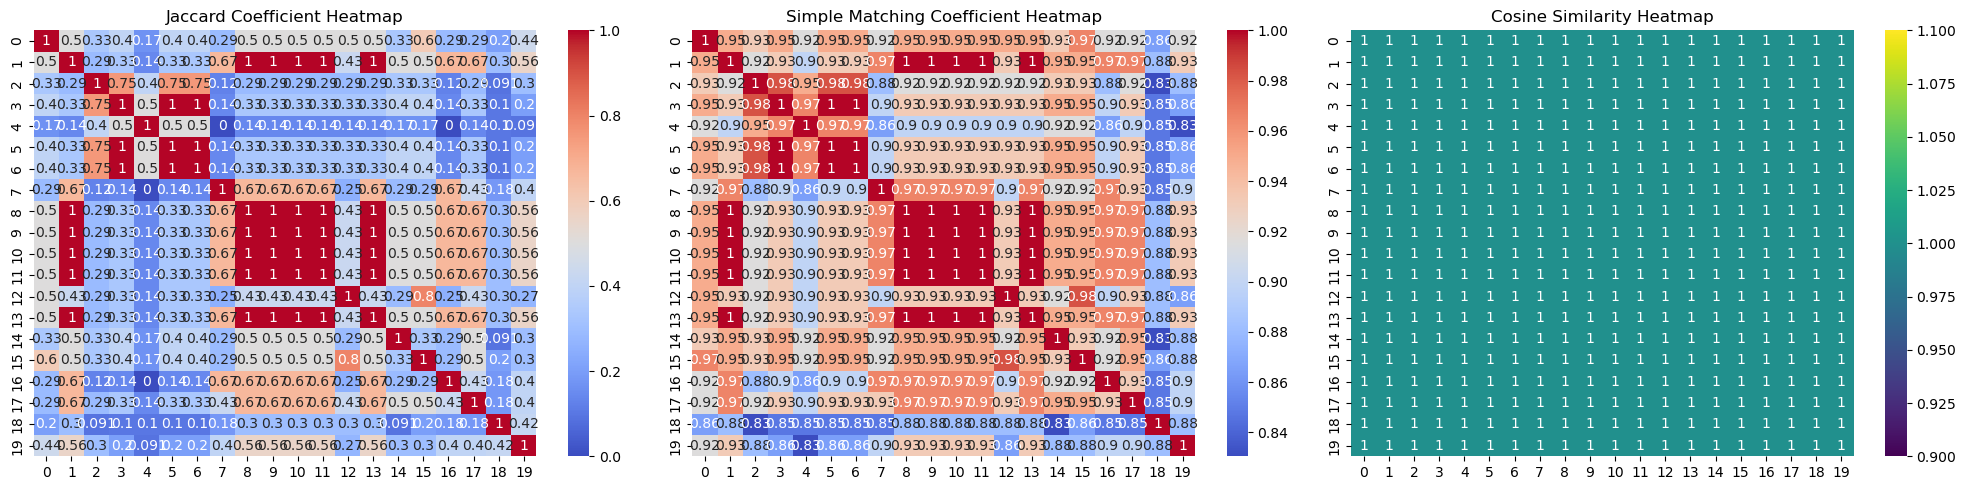

In [32]:
#a10
import seaborn as sns
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt



df4 = pd.read_excel(file, sheet_name=2)
df4.replace('?', np.nan, inplace=True)



numeric_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
df4[numeric_cols] = df4[numeric_cols].apply(pd.to_numeric, errors='coerce')
#
for col in numeric_cols:
    if df4[col].isnull().sum() > 0:
        if len(np.where(np.abs(zscore(df4[col].dropna())) > 3)[0]) > 0:
            df4[col].fillna(df4[col].median(), inplace=True)
        else:
            df4[col].fillna(df4[col].mean(), inplace=True)


scaler = MinMaxScaler()
df4[numeric_cols] = scaler.fit_transform(df4[numeric_cols])


binary_categorical_cols = [
    'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
    'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured'
]

label_encoders = {}
for col in binary_categorical_cols:
    le = LabelEncoder()
    df4[col] = le.fit_transform(df4[col].astype(str))
    label_encoders[col] = le

df4 = pd.get_dummies(df4, columns=['referral source', 'Condition'])


first_20_obs = df4.iloc[:20]


binary_cols = binary_categorical_cols + list(df4.columns[df4.columns.str.startswith('referral source_')]) + list(df4.columns[df4.columns.str.startswith('Condition_')])

def calculate_jc_smc(obs1, obs2):
    f11 = np.sum((obs1 == 1) & (obs2 == 1))
    f00 = np.sum((obs1 == 0) & (obs2 == 0))
    f01 = np.sum((obs1 == 0) & (obs2 == 1))
    f10 = np.sum((obs1 == 1) & (obs2 == 0))
    JC = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) != 0 else 0
    SMC = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else 0
    return JC, SMC


jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cos_matrix = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
    # if i != j:
            jc, smc = calculate_jc_smc(first_20_obs.iloc[i][binary_cols], first_20_obs.iloc[j][binary_cols])
            jc_matrix[i, j] = jc
            smc_matrix[i, j] = smc
            cos_matrix[i, j] = cosine_similarity(first_20_obs.iloc[i].values.reshape(1, -1), first_20_obs.iloc[j].values.reshape(1, -1))[0][0]


plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, annot=True, cmap='coolwarm')
plt.title('Jaccard Coefficient Heatmap')

plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=True, cmap='coolwarm')
plt.title('Simple Matching Coefficient Heatmap')

plt.subplot(1, 3, 3)
sns.heatmap(cos_matrix, annot=True, cmap='viridis')
plt.title('Cosine Similarity Heatmap')

plt.tight_layout()
plt.show()


The number of vectors in matrix, number of rows in matrix, inverse of matrix, dimensionality of matrix are:
(4, 3, array([[-0.01158602, -0.03328061,  0.00992701,  0.0309081 ,  0.01893411,
         0.01257157, -0.00872551,  0.00049436,  0.01868374, -0.00579619],
       [ 0.00809324, -0.03931864,  0.02004214,  0.01022259,  0.01645572,
        -0.01682076,  0.00109285,  0.00621381, -0.00780631, -0.0171085 ],
       [-0.02400235,  0.12210231, -0.06177958, -0.03305478, -0.05136901,
         0.05064536, -0.00279828, -0.01898852,  0.02274531,  0.05261889],
       [ 0.00150006,  0.00203556,  0.00021249, -0.0018353 , -0.00064341,
        -0.00095362,  0.00101203,  0.00046022, -0.00124752,  0.00037604]]), (10, 4))
The solution vector is:
[ 1. 55. 18.]
Categories of customers are:


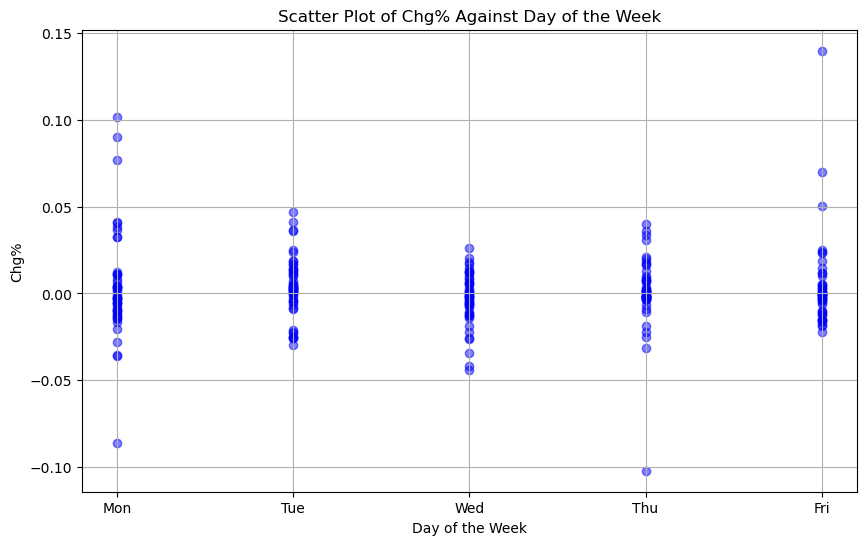

((1560.6634538152612, 58732.36535253922), 1550.7060000000001, 1698.9526315789474, 0.4979919678714859, 0.42, 2.0916)


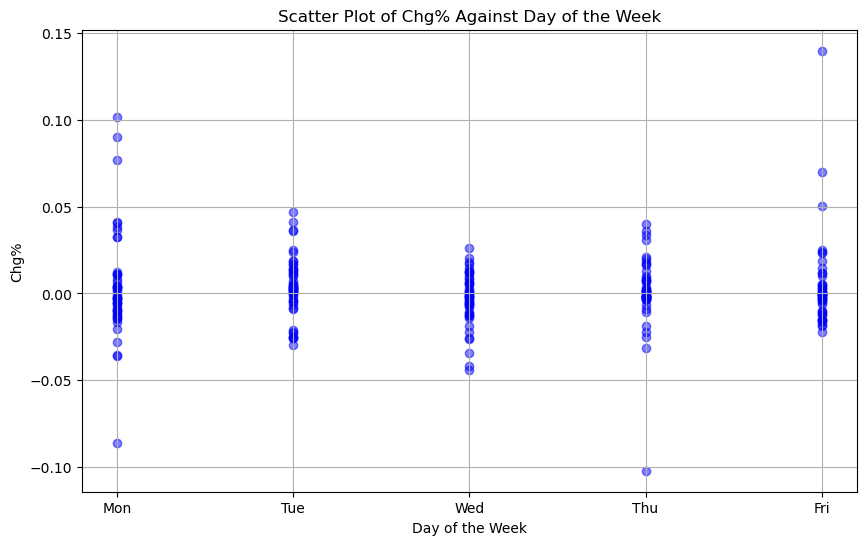

Mean and Variance of the data is:
(1560.6634538152612, 58732.36535253922)
Mean of the data on Wednesday is:
1550.7060000000001
Mean of the data in April is:
1698.9526315789474
Loss probability is:
0.4979919678714859
Wednesday profit probability is:
0.42
Conditional profit is:
2.0916
Mean of the data is:
age     73.555822
TSH      4.867869
T3       1.950577
TT4    108.473796
T4U      0.974640
FTI    113.234959
TBG     26.147258
dtype: float64
Standard deviation of the data is:
age    1183.976718
TSH      23.073462
T3        0.751748
TT4      36.621135
T4U       0.191373
FTI      39.714898
TBG       4.172634
dtype: float64
Variance of the data is:
age    1.401801e+06
TSH    5.323847e+02
T3     5.651248e-01
TT4    1.341108e+03
T4U    3.662380e-02
FTI    1.577273e+03
TBG    1.741087e+01
dtype: float64
Normalized data using MinMaxScaler and StandardScaler is:
(         Record ID       age  sex  on thyroxine  query on thyroxine  \
0     0.000000e+00  0.000427    1             0              

In [38]:
if __name__ == "__main__":
    #a1 
    #number of vectors in matrix, number of rows in matrix, inverse of matrix, dimensionality of matrix
    print("The number of vectors in matrix, number of rows in matrix, inverse of matrix, dimensionality of matrix are:")
    print(a1())
    #a2
    print("The solution vector is:")
    print(a2())
    print("Categories of customers are:")
    print(a3())
    result = a3()
    mean_var_result = result[0]
    wed_mean_result = result[1]
    april_mean_result = result[2]
    loss_probability_result = result[3]
    wednesday_profit_probability_result = result[4]
    conditional_profit_result = result[5]
    print("Mean and Variance of the data is:")
    print(mean_var_result)
    print("Mean of the data on Wednesday is:")
    print(wed_mean_result)
    print("Mean of the data in April is:")
    print(april_mean_result)
    print("Loss probability is:")
    print(loss_probability_result)
    print("Wednesday profit probability is:")
    print(wednesday_profit_probability_result)
    print("Conditional profit is:")
    print(conditional_profit_result)
    
    mean_var_thyroid_result = mean_var_thyroid()
    print("Mean of the data is:")
    print(mean_var_thyroid_result[0])
    print("Standard deviation of the data is:")
    print(mean_var_thyroid_result[1])
    print("Variance of the data is:")
    print(mean_var_thyroid_result[2])
    print("Normalized data using MinMaxScaler and StandardScaler is:")
    print(normalize())
    

    print("The Jaccard Coefficient and Simple Matching Coefficient are:")
    print(a4())
    print("The cosine similarity is:")
    print(a9())

    
    

In [29]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
